In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Xử lý dữ liệu đầu vào

In [51]:
# import dữ liệu
data = pd.read_csv("cars.csv")
data.describe()

,Price,miles(000),age,miles,year
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,11670.890909,65.276200,6.636364,65276.200000,2010.363636
std,5145.776725,54.448334,5.488586,54448.334008,5.488586
min,1000.000000,2.500000,1.000000,2500.000000,1989.000000
25%,8150.000000,21.700000,3.000000,21700.000000,2008.000000
50%,12500.000000,39.800000,4.000000,39800.000000,2013.000000
75%,15350.000000,106.070500,9.000000,106070.500000,2014.000000
max,21995.000000,200.000000,28.000000,200000.000000,2016.000000


In [52]:
data.isnull().sum()

Price         0
miles(000)    0
age           0
miles         0
year          0
model         0
dtype: int64

In [53]:
# xóa cột miles(000)
data = data.drop(columns=['miles'])
data.tail()

,Price,miles(000),age,year,model
50,4950,145.000,12,2005,DX
51,4200,132.473,13,2004,DX
52,2500,200.000,18,1999,DX
53,2500,122.000,14,2003,DX
54,1000,196.850,20,1997,DX


In [54]:
# lưu lại category của cột model
model_categories = data['model'].astype('category').cat.categories
print(model_categories)
# đổi dữ liệu cột model thành dạng số
data['model'] = data['model'].astype('category').cat.codes
data.tail()

Index(['DX', 'EX-T', 'Ex-L', 'SE'], dtype='object')


,Price,miles(000),age,year,model
50,4950,145.000,12,2005,0
51,4200,132.473,13,2004,0
52,2500,200.000,18,1999,0
53,2500,122.000,14,2003,0
54,1000,196.850,20,1997,0


# Tính hệ số tương quan + heatmap

In [55]:
data.corr()

,Price,miles(000),age,year,model
Price,1.000000,-0.890479,-0.857075,0.857075,0.571045
miles(000),-0.890479,1.000000,0.779441,-0.779441,-0.592755
age,-0.857075,0.779441,1.000000,-1.000000,-0.603611
year,0.857075,-0.779441,-1.000000,1.000000,0.603611
model,0.571045,-0.592755,-0.603611,0.603611,1.000000


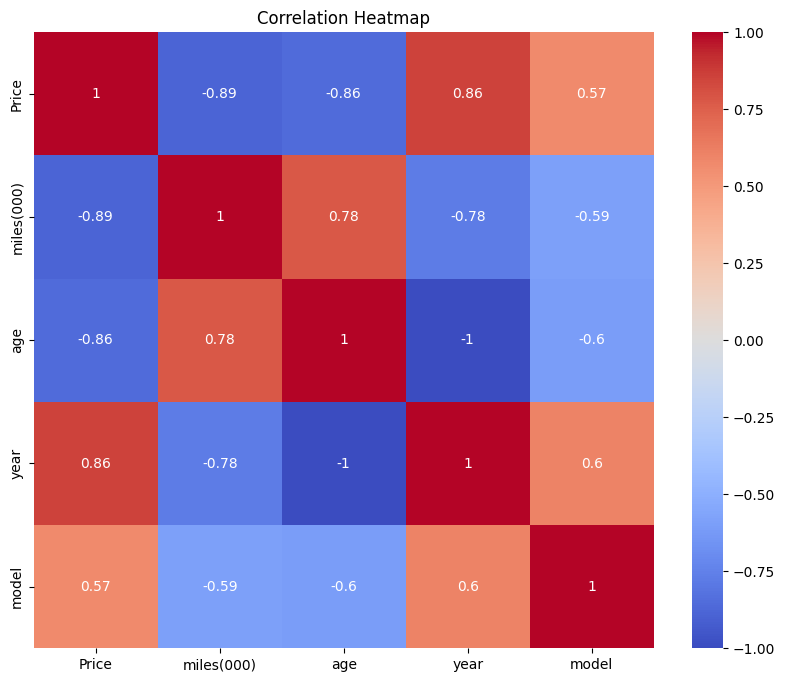

In [56]:
# ve heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Xây dựng mô hình HỒI QUY TUYẾN TÍNH ĐA BIẾN

In [57]:
# khai báo mô hình
model = LinearRegression()

# khai bao Biến độc lập + phụ thuộc
y = data['Price']
X = data.drop(columns=["Price"])

In [58]:
# chia tap train : test (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=38)

In [ ]:
# huan luyen mo hinh
model.fit(X_train, y_train)

In [60]:
# dự đoán
y_pred = model.predict(X_test)

# Tính chỉ số MSE + R^2 (đánh giá mô hình)

In [ ]:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = model.score(X_test, y_test)
r2_sklearn = r2_score(y_true=y_test, y_pred=y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 (from model.score): {r2:.4f}')
print(f'R^2 (from r2_score): {r2_sklearn}')